**Predicting Heart Disease using Machine Learning**

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

**What is classification?**

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.


**6 Step Machine Learning Modelling Framework**
More specifically, we'll look at the following topics.

Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
1. Model training - create model(s) to learn to predict a target variable based on other variables.
2. Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
3. Model comparison - comparing several different models to find the best one.
4. Model fine-tuning - once we've found a good model, how can we improve it?
5. Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
6. Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
Reporting what we've found - if we had to present our work, what would we show someone?
To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.


Tools which can be used for each step of the machine learning modelling process.
We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

**1. Problem Definition**
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**2. Data**
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

**3. Evaluation**
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

**4. Features**
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots) thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

**Preparing the tools**
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

# 1. Problem Definition 

Figuring out the outcome of our problem with out writing code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier , 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score , GridSearchCV
from sklearn.metrics import precision_score , recall_score , f1_score , roc_curve , confusion_matrix , classification_report ,RocCurveDisplay , auc

# 2. Data Exploration (Exploratory data analysis (EDA))

In [2]:
df = pd.read_csv("resources/data/157 - heart-disease.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3       0
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3       0
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3       0
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3       0
302   57    0   1       130   236    0        0      174      0      0.0      1   1     2       0

[303 rows x 14 columns]

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
# Comparing diffrent Features to find out important once

pd.crosstab(df.target , df.sex).plot( kind="bar", color=["salmon" , "lightgreen"] ,figsize=(10,6)  )

plt.xticks(rotation=1 ) 
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
plt.title("Heart Rate Frequency between sex and target")
plt.legend(["Male" , "Female"])





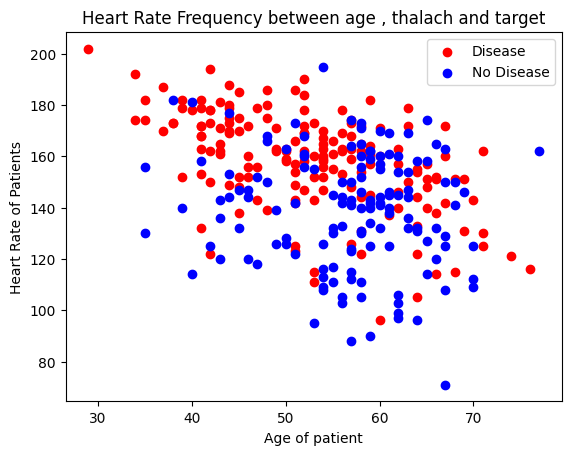

In [9]:
## Comparing thalach with age 

plt.scatter(df.age[df.target == 1] , df.thalach[df.target==1] , c="red")
plt.scatter(df.age[df.target == 0] , df.thalach[df.target==0] , c="blue")

plt.xticks(rotation=1 ) 

plt.xlabel("Age of patient")
plt.ylabel("Heart Rate of Patients")
plt.title("Heart Rate Frequency between age , thalach and target")
plt.legend(["Disease" , "No Disease"])



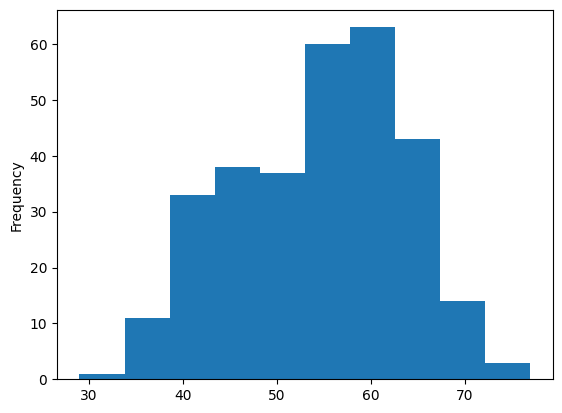

In [10]:
# This is a normal distribution curve any curve other than this indicates the presence of outliers which must be removed before applying sklearn
df["age"].plot.hist();

In [11]:
# Comparing chest pain with slope and target

In [12]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [13]:
df.slope.value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [14]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [15]:
plt.scatter(df.cp[df.target==1] , df.chol[df.target == 1] ,color="lightgreen" )
plt.scatter(df.cp[df.target==0] , df.chol[df.target == 0] , color="salmon")


plt.xticks(rotation=1 ) 

plt.xlabel("Chest Pain Level")
plt.ylabel("Cholestrol Level of Patients")
plt.title("Heart Rate Frequency between slope , cp and target")
plt.legend(["Chest Pain" , "Cholestrol Level"]);


In [16]:
## droping the sample with more then 500 chol as is an outlier

df.chol[df.chol > 500]
df.drop(index = 85 , inplace=True)

In [17]:
df.chol[df.chol > 500]

Series([], Name: chol, dtype: int64)

In [18]:
df.size

4228

In [19]:
df.shape

(302, 14)

In [20]:
df.chol.isna().sum()

0

In [21]:
!pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Using seaborn heatmap for co relatioinabs
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092298 -0.073638  0.285074  0.198768  0.123668   
sex      -0.092298  1.000000 -0.044712 -0.061698 -0.180288  0.043168   
cp       -0.073638 -0.044712  1.000000  0.050920 -0.104171  0.096018   
trestbps  0.285074 -0.061698  0.050920  1.000000  0.152531  0.176532   
chol      0.198768 -0.180288 -0.104171  0.152531  1.000000  0.023294   
fbs       0.123668  0.043168  0.096018  0.176532  0.023294  1.000000   
restecg  -0.112119 -0.063420  0.047920 -0.117638 -0.139828 -0.085748   
thalach  -0.402041 -0.041983  0.294850 -0.045357 -0.020472 -0.007946   
exang     0.100419  0.138885 -0.392937  0.065577  0.086855  0.024729   
oldpeak   0.208534  0.098835 -0.151145  0.195103  0.047183  0.006420   
slope    -0.166471 -0.034012  0.122160 -0.123786  0.009799 -0.060852   
ca        0.280763  0.115297 -0.179131  0.099375  0.090977  0.137147   
thal      0.063155  0.216728 -0.166087  0.065977  0.081377 -0.030539   
target   -0.230720 -0.277867  0.432080 -0.142466 -0.111147 -0.026826   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.112119 -0.402041  0.100419  0.208534 -0.166471  0.280763   
sex      -0.063420 -0.041983  0.138885  0.098835 -0.034012  0.115297   
cp        0.047920  0.294850 -0.392937 -0.151145  0.122160 -0.179131   
trestbps -0.117638 -0.045357  0.065577  0.195103 -0.123786  0.099375   
chol     -0.139828 -0.020472  0.086855  0.047183  0.009799  0.090977   
fbs      -0.085748 -0.007946  0.024729  0.006420 -0.060852  0.137147   
restecg   1.000000  0.045723 -0.073235 -0.057278  0.091099 -0.074610   
thalach   0.045723  1.000000 -0.378200 -0.345162  0.388160 -0.212357   
exang    -0.073235 -0.378200  1.000000  0.289683 -0.259635  0.114280   
oldpeak  -0.057278 -0.345162  0.289683  1.000000 -0.577124  0.224102   
slope     0.091099  0.388160 -0.259635 -0.577124  1.000000 -0.081817   
ca       -0.074610 -0.212357  0.114280  0.224102 -0.081817  1.000000   
thal     -0.008272 -0.098362  0.209952  0.208964 -0.102636  0.154943   
target    0.140706  0.421096 -0.435601 -0.432927  0.348569 -0.390431   

              thal    target  
age       0.063155 -0.230720  
sex       0.216728 -0.277867  
cp       -0.166087  0.432080  
trestbps  0.065977 -0.142466  
chol      0.081377 -0.111147  
fbs      -0.030539 -0.026826  
restecg  -0.008272  0.140706  
thalach  -0.098362  0.421096  
exang     0.209952 -0.435601  
oldpeak   0.208964 -0.432927  
slope    -0.102636  0.348569  
ca        0.154943 -0.390431  
thal      1.000000 -0.348641  
target   -0.348641  1.000000

In [23]:
fig , ax = plt.subplots( figsize=(15,10))
ax = sns.heatmap(df.corr() , annot=True , fmt=".2f" ,linewidths= 1 , cmap="GnBu" )
ax.set_title("Heat Map of Co relation between Data");

# positive corelation means the two columns are directly proportional (if one increase second also increase) and vice versa



# 3. Model Evaluation

In [24]:
models = { "Logistic Regression" : LogisticRegression(max_iter=5000) , "KNN" : KNeighborsClassifier() , "Random Forrest" : RandomForestClassifier() }

In [25]:
# creating a function to train and test models

def train_and_test_models(model , x_train,x_test,y_train,y_test):
    models_acc = {}
    for name , model in model.items():
        model.fit(x_train,y_train)
        acc = model.score(x_test,y_test)
        models_acc[name] = acc
    return models_acc
    


In [4]:
x=df.drop("target" , axis=1)

y=df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [27]:
x_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
78    52    1   1       128   205    1        1      184      0      0.0   
128   52    0   2       136   196    0        0      169      0      0.1   
288   57    1   0       110   335    0        1      143      1      3.0   
258   62    0   0       150   244    0        1      154      1      1.4   
237   60    1   0       140   293    0        0      170      0      1.2   

     slope  ca  thal  
78       2   0     2  
128      1   0     2  
288      1   1     3  
258      1   0     2  
237      1   2     3

In [28]:
y_train.head()

78     1
128    1
288    0
258    0
237    0
Name: target, dtype: int64

In [29]:
model_scores = train_and_test_models(models , x_train , x_test , y_train , y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6885245901639344,
 'Random Forrest': 0.8360655737704918}

In [30]:
model_score_df = pd.DataFrame(model_scores  , index=["Scores"])
model_score_df.T.plot.bar(color="salmon")
plt.xticks(rotation=0);

## Tuning HyperParameters

In [31]:
# Starting with KNN 

knn = KNeighborsClassifier()

test_score=[]


for i in range(1 , 30):
    knn.set_params(**{"n_neighbors":i})
    knn.fit(x_train , y_train)
    test_score.append(knn.score(x_test , y_test) * 100)

In [32]:
test_score

[59.01639344262295,
 55.73770491803278,
 55.73770491803278,
 62.295081967213115,
 68.85245901639344,
 67.21311475409836,
 63.934426229508205,
 60.65573770491803,
 67.21311475409836,
 65.57377049180327,
 70.49180327868852,
 63.934426229508205,
 67.21311475409836,
 67.21311475409836,
 63.934426229508205,
 62.295081967213115,
 65.57377049180327,
 63.934426229508205,
 68.85245901639344,
 72.1311475409836,
 72.1311475409836,
 73.77049180327869,
 73.77049180327869,
 78.68852459016394,
 78.68852459016394,
 73.77049180327869,
 75.40983606557377,
 75.40983606557377,
 73.77049180327869]

The maximum accuracy acheived by KNN model is 78.69 %


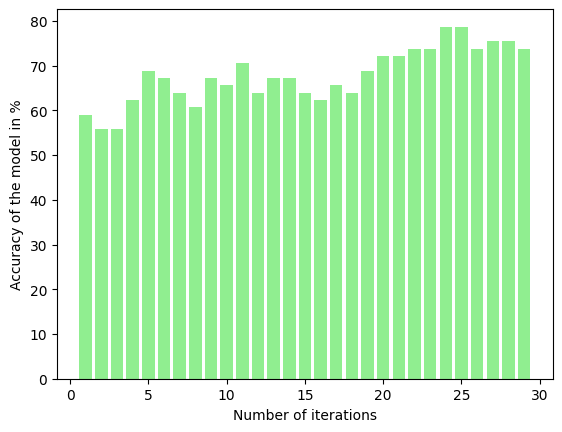

In [33]:
plt.bar( range(1,30) ,test_score , color="lightgreen")
plt.xlabel("Number of iterations")

plt.ylabel("Accuracy of the model in %");


print(f"The maximum accuracy acheived by KNN model is {max(test_score):.2f} %")

## Tuning using RandomizedSearchCV


In [52]:
log_reg_grid={"solver" : ["lbfgs", "liblinear"] , "C" :np.logspace(-4 , 4 , 20) }

ran_for_grid = {"n_estimators" : np.arange(10 , 1000 , 50) ,"max_features" : ['log2', 'sqrt'] , "max_depth" : np.arange(2,100,5) , "min_samples_split" :np.arange(2,100,5)  }

In [35]:
# Starting with LLogisticRegression


lg = LogisticRegression(max_iter=1000 , )

rn_log = RandomizedSearchCV(lg , log_reg_grid , n_iter=20).fit(x_train , y_train)

D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: Co

In [36]:
rn_log.best_params_

{'solver': 'newton-cg', 'C': 1}

In [37]:
lg.set_params(**{'solver': 'liblinear', 'C':  19.144819761699537});
lg.fit(x_train , y_train)
lg.score(x_test , y_test) , rn_log.score(x_test , y_test)

(0.8524590163934426, 0.8524590163934426)

In [39]:
## Using Random forest clasfifier

clf = RandomForestClassifier()

rd_clf = RandomizedSearchCV(clf , ran_for_grid , n_iter=20 )

rd_clf.fit(x_train , y_train)

KeyboardInterrupt: 

In [ ]:
rd_clf.best_params_

In [ ]:


clf.set_params(**{'n_estimators': 660,
 'min_samples_split': 82,
 'max_features': 'sqrt',
 'max_depth': 2})

clf.fit(x_train , y_train)
clf.score(x_test , y_test),rd_clf.score(x_test , y_test)

## Tuning using Grid Search CV

In [53]:
lg = LogisticRegression(max_iter=1000 ,C=1.25458)

lg_gd = GridSearchCV(lg , log_reg_grid , cv=5 , verbose=2)

lg_gd.fit(x_train , y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .............C=0.00026366508987303583, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.00026366508987303583,

D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=4.281332398719396, solver=lbfgs; total time=   0.2s
[CV] END ..................C=4.281332398719396, solver=lbfgs; total time=   0.1s
[CV] END ..................C=4.281332398719396, solver=lbfgs; total time=   0.1s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.1s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.1s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.1s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.1s
[CV] END .................C=29.763514416313132, solver=lbfgs; total time=   0.1s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END ..................C=78.47599703514607, solver=lbfgs; total time=   0.1s
[CV] END ..................C=78.47599703514607, solver=lbfgs; total time=   0.1s
[CV] END ..................C

D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=206.913808111479, solver=lbfgs; total time=   0.1s
[CV] END ...................C=206.913808111479, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=206.913808111479, solver=lbfgs; total time=   0.1s
[CV] END ...................C=206.913808111479, solver=lbfgs; total time=   0.1s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ..................C=545.5594781168514, solver=lbfgs; total time=   0.1s
[CV] END ..................C=545.5594781168514, solver=lbfgs; total time=   0.1s
[CV] END ..................C=545.5594781168514, solver=lbfgs; total time=   0.1s
[CV] END ..................C=545.5594781168514, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=545.5594781168514, solver=lbfgs; total time=   0.1s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ...................C=1438.44988828766, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=1438.44988828766, solver=lbfgs; total time=   0.1s
[CV] END ...................C=1438.44988828766, solver=lbfgs; total time=   0.1s
[CV] END ...................C=1438.44988828766, solver=lbfgs; total time=   0.1s
[CV] END ...................C=1438.44988828766, solver=lbfgs; total time=   0.1s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.1s
[CV] END ..................C=3792.690190732246, solver=lbfgs; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ..............C=3792.690190732246, solver=liblinear; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.1s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.1s


D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.1s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.1s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(C=1.25458, max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['lbfgs', 'liblinear']},
             verbose=2)

In [54]:
lg_gd.score(x_test,y_test) , lg_gd.best_params_

(0.8524590163934426, {'C': 0.08858667904100823, 'solver': 'liblinear'})

# Using diffrent Evaluation techniques

In [56]:
y_preds = lg_gd.predict(x_test)

In [57]:
y_test

25     1
170    0
203    0
139    1
289    0
      ..
279    0
122    1
18     1
275    0
10     1
Name: target, Length: 61, dtype: int64

In [60]:
fpr , tpr ,threshold = roc_curve(y_preds , y_test)

In [65]:
auc_score =auc(fpr,tpr)

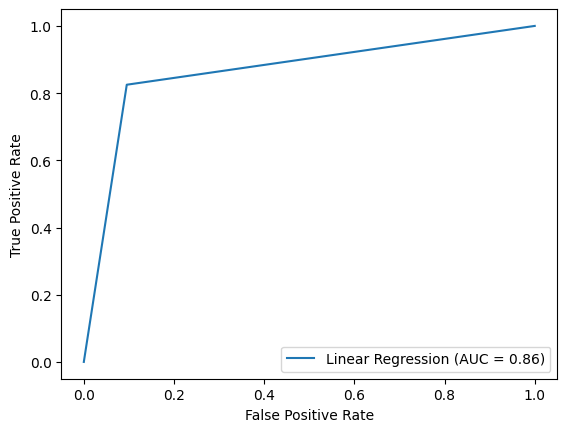

In [66]:
roc_display = RocCurveDisplay( fpr=fpr, tpr= tpr , roc_auc=auc_score , estimator_name="Linear Regression")

roc_display.plot()

In [70]:
# Plotting confusion Matrix

cm = confusion_matrix(y_test , y_preds)

Text(0.5, 3.722222222222216, 'predicted Labels')

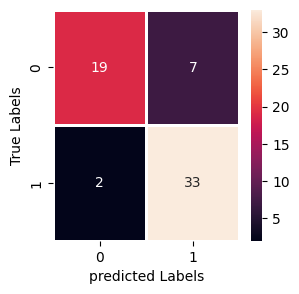

In [77]:
fig ,ax = plt.subplots(figsize=(3,3))

ax = sns.heatmap(cm ,annot=True , linewidths=1)

plt.ylabel("True Labels")

plt.xlabel("predicted Labels")


In [89]:
## Cclassification_report

cr = classification_report(y_test,y_preds )
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.82      0.94      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.84        61
weighted avg       0.86      0.85      0.85        61



In [91]:
lg_gd.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [121]:
# Precision , accuracy and f1 using Ccross_val_score

clf = LogisticRegression(C=0.08858667904100823 , solver='liblinear')

cr_acc = cross_val_score(clf , x ,y , cv=5 , scoring="accuracy") 

cr_acc = np.mean(cr_acc) * 100

cr_acc

83.43169398907105

In [120]:
# Precision , accuracy and f1 using Ccross_val_score


cr_prec = cross_val_score(clf , x ,y , cv=5 , scoring="precision") 

cr_prec = np.mean(cr_prec) * 100

cr_prec

81.32362082362083

In [119]:
# Precision , accuracy and f1 using Ccross_val_score



cr_f1 = cross_val_score(clf , x ,y , cv=5 , scoring="f1") 

cr_f1 = np.mean(cr_f1) * 100

cr_f1

85.69902567352426

In [118]:
# Precision , accuracy and f1 using Ccross_val_score



cr_rec = cross_val_score(clf , x ,y , cv=5 , scoring="recall") 

cr_rec = np.mean(cr_rec) * 100

cr_rec

90.83333333333334

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


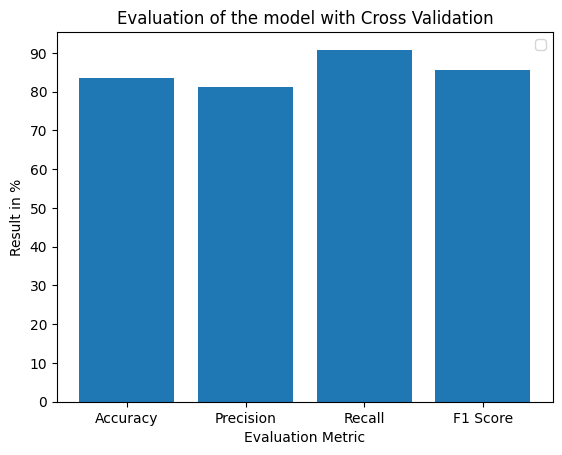

In [136]:
plt.bar(  ["Accuracy" , "Precision" , "Recall" , "F1 Score"],[cr_acc , cr_prec ,cr_rec ,cr_f1] )
plt.title("Evaluation of the model with Cross Validation")

plt.yticks(np.arange(0 , 100 , 10))

plt.xlabel("Evaluation Metric")

plt.ylabel("Result in %")


In [137]:
# Feature Importance
# Feature importance in logistic regression is done by using model.coef_

clf.fit(x_train , y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [138]:
clf.coef_

array([[ 0.00591408, -0.59364859,  0.67369786, -0.01981621, -0.00201356,
         0.06083293,  0.17028566,  0.03053527, -0.39587591, -0.40877157,
         0.16935836, -0.4970426 , -0.58979693]])

In [140]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))

feature_dict

{'age': 0.005914083943490187,
 'sex': -0.5936485871814468,
 'cp': 0.6736978625375165,
 'trestbps': -0.01981620956346533,
 'chol': -0.002013562256371321,
 'fbs': 0.06083292504343589,
 'restecg': 0.17028566428835232,
 'thalach': 0.03053526724193286,
 'exang': -0.3958759072717498,
 'oldpeak': -0.4087715743103803,
 'slope': 0.169358364724795,
 'ca': -0.4970426020317385,
 'thal': -0.5897969330611288}

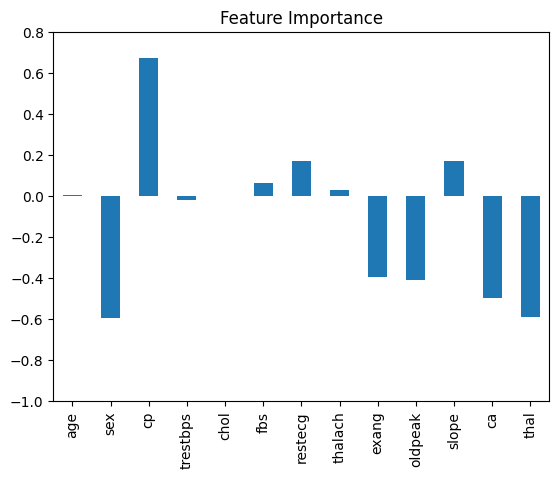

In [154]:
feature_df = pd.DataFrame(feature_dict , index=["Feature Coefficents"])

feature_df.T.plot.bar( title="Feature Importance" , legend = False )
plt.yticks(np.arange(-1 , 1 , 0.2));

# Experimentation

In [42]:
# Using XG Boost Classifier

xgclf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss' , base_score=0.9 ,n_estimators = 500 , eta = 0.01)

In [43]:
xgclf.fit(x_train , y_train)

D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

XGBClassifier(base_score=0.9, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [44]:
xgclf.score(x_test , y_test)

D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

0.7868852459016393

In [45]:
xgcv = cross_val_score(xgclf , x , y , cv=5)

D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
D:\Development\Python_and_ML\heart_disease_project\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [11]:
xgcv

array([0.81967213, 0.80327869, 0.7704918 , 0.78333333, 0.76666667])